In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv("/Users/filippo/ScrivaniaLocale/E-HealthProject/datasetWithClusterLabels.csv")
unique = np.unique(df['Cluster label'])
print(unique)
print(df.head())
print(df.shape)

[1 2 3]
   Unnamed: 0  index       age  gender  education  marital    income  phq_1  \
0           0      0  0.648649       1       0.00        1  0.173913      0   
1           1      1  0.891892       3       0.65        1  0.282609      0   
2           2      2  0.594595       0       0.15        1  0.000000      0   
3           3      3  0.027027       0       1.00        5  0.456522      2   
4           4      4  0.648649       2       0.40        1  0.652174      0   

   phq_2  phq_3  ...  ccs_4  ccs_5  ccs_6  ccs_7  ccs_8  ccs_9  ccs_10  \
0    0.0    1.0  ...    1.0    4.0    3.0      0      4      0       0   
1    0.0    0.0  ...    6.0    6.0    1.0      0      1      4       0   
2    0.0    0.0  ...    6.0    6.0    0.0      5      0      2       1   
3    1.0    0.0  ...    4.0    0.0    4.0      6      0      1       1   
4    1.0    0.0  ...    6.0    0.0    0.0      6      1      1       0   

   ccs_11  ccs_12  Cluster label  
0       3       1              2  
1 

In [28]:
cluster1 = df.loc[(df['Cluster label'] == 1)]
cluster2 = df.loc[(df['Cluster label'] == 2)]
cluster3 = df.loc[(df['Cluster label'] == 3)]

print("Cluster 1 shape: ,", cluster1.shape)
print("Cluster 2 shape: ,", cluster2.shape)
print("Cluster 3 shape: ,", cluster3.shape)

clusters = [cluster1, cluster2, cluster3]


Cluster 1 shape: , (48, 57)
Cluster 2 shape: , (52, 57)
Cluster 3 shape: , (50, 57)


**AGE**

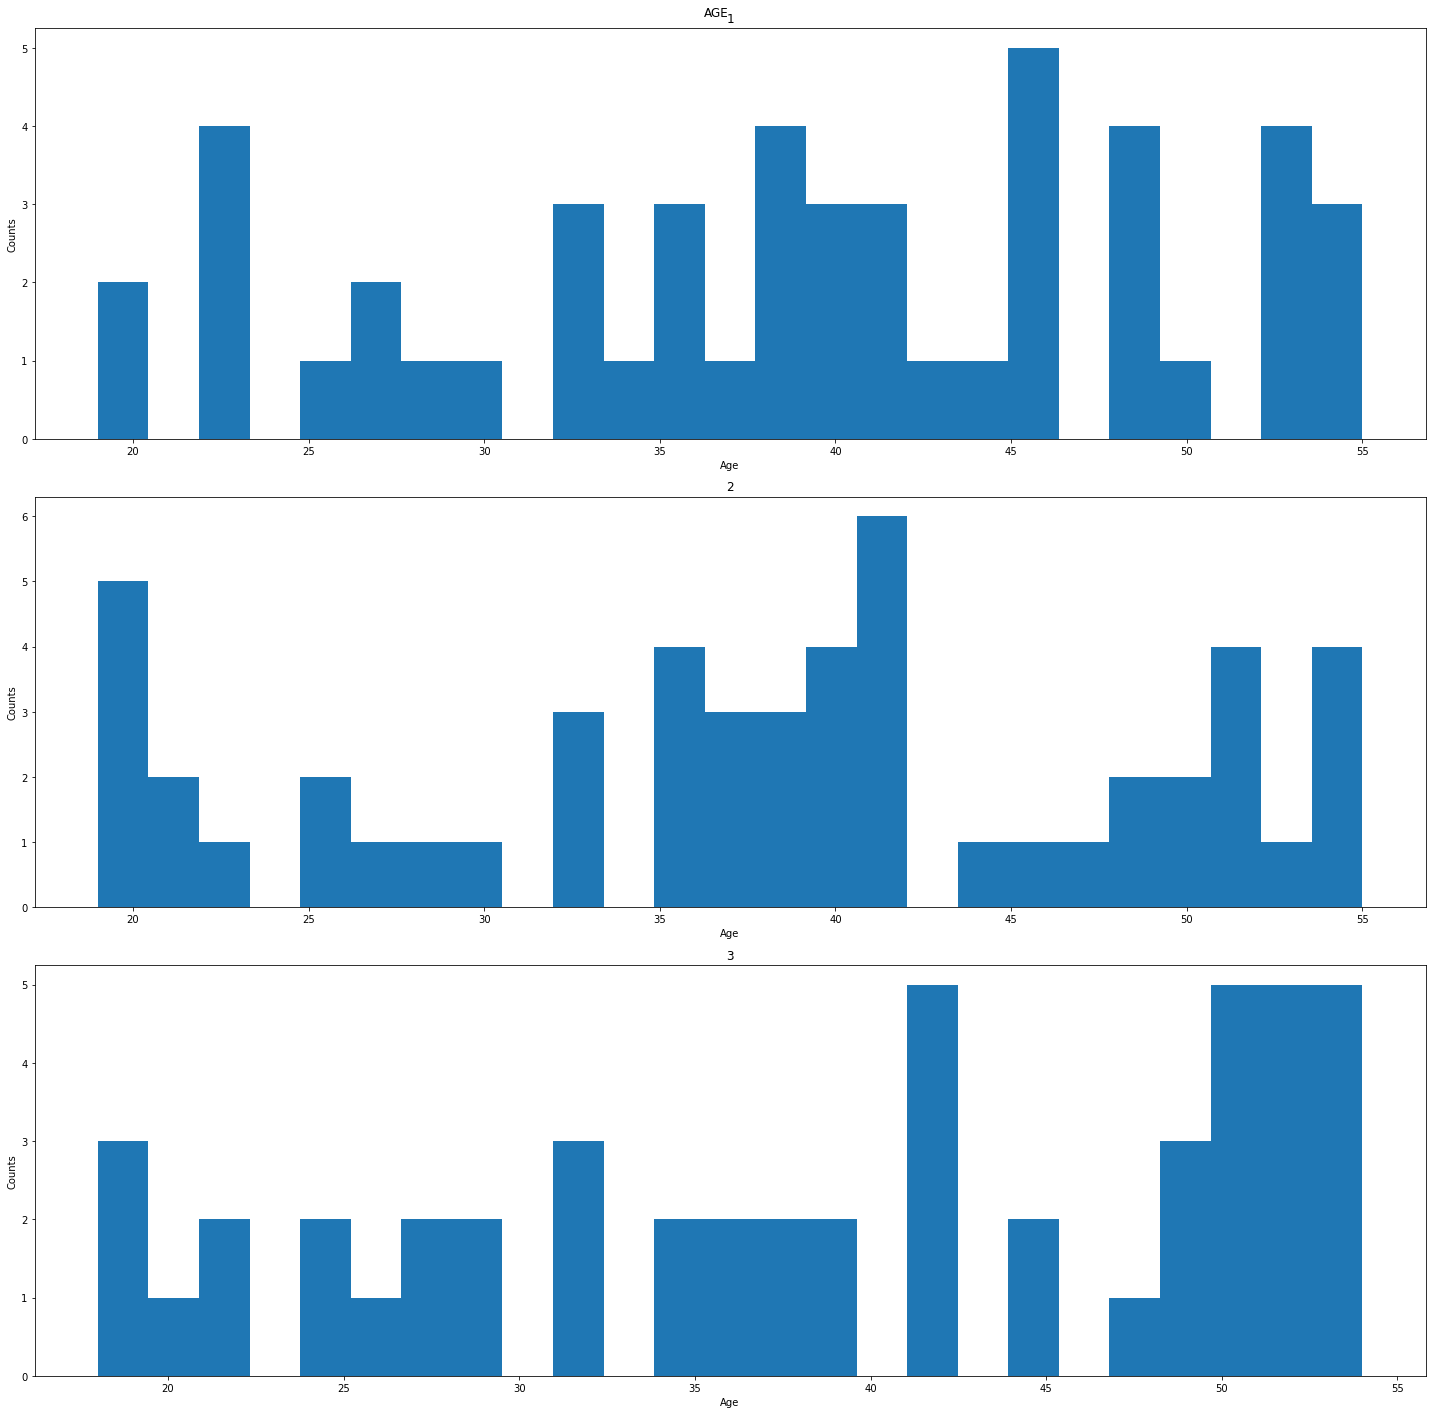

In [29]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20,20))
axes = axes.flatten()

maxAge = 55
minAge = 18

for i in range(0, len(axes)): 
    ax = axes[i]
    
    scaledBackAge = (clusters[i]['age']*(maxAge-minAge)) + minAge; # rescale the data to see the age distribution
    
    ax.hist(scaledBackAge, bins=25)
    ax.set_xlabel('Age')
    ax.set_ylabel('Counts')
    ax.set_title(str(i+1))

plt.suptitle('AGE')
plt.tight_layout()
plt.show()

[1 2 3]


ValueError: The following variable cannot be assigned with wide-form data: `hue`

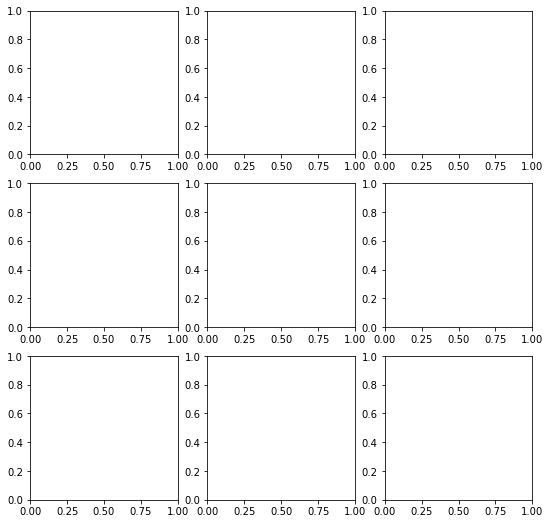

In [31]:
questionnaire_columns_phq = ['phq_1', 'phq_2', 'phq_3', 'phq_4', 'phq_5', 'phq_6', 'phq_7', 'phq_8', 'phq_9']

# Create subplots for the histograms
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
axes = axes.flatten()
x_val = [0, 1, 2, 3]

unique = np.unique(df['Cluster label'])
print(unique)
for i, column_name in enumerate(questionnaire_columns_phq):
    sns.histplot(df[column_name],ax=axes[i], hue=df['Cluster label'])

plt.suptitle('PHQ Questionnaire')
plt.tight_layout()
plt.show()